# Exercise 10

## This question should be answered using the Carseats data set. Let's do some data cleaning (if needed) and exploratory data analysis first before fitting anything on it. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()

In [2]:
df = pd.read_csv('carseats.csv')

In [3]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [5]:
df.isna().any()

Sales          False
CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
dtype: bool

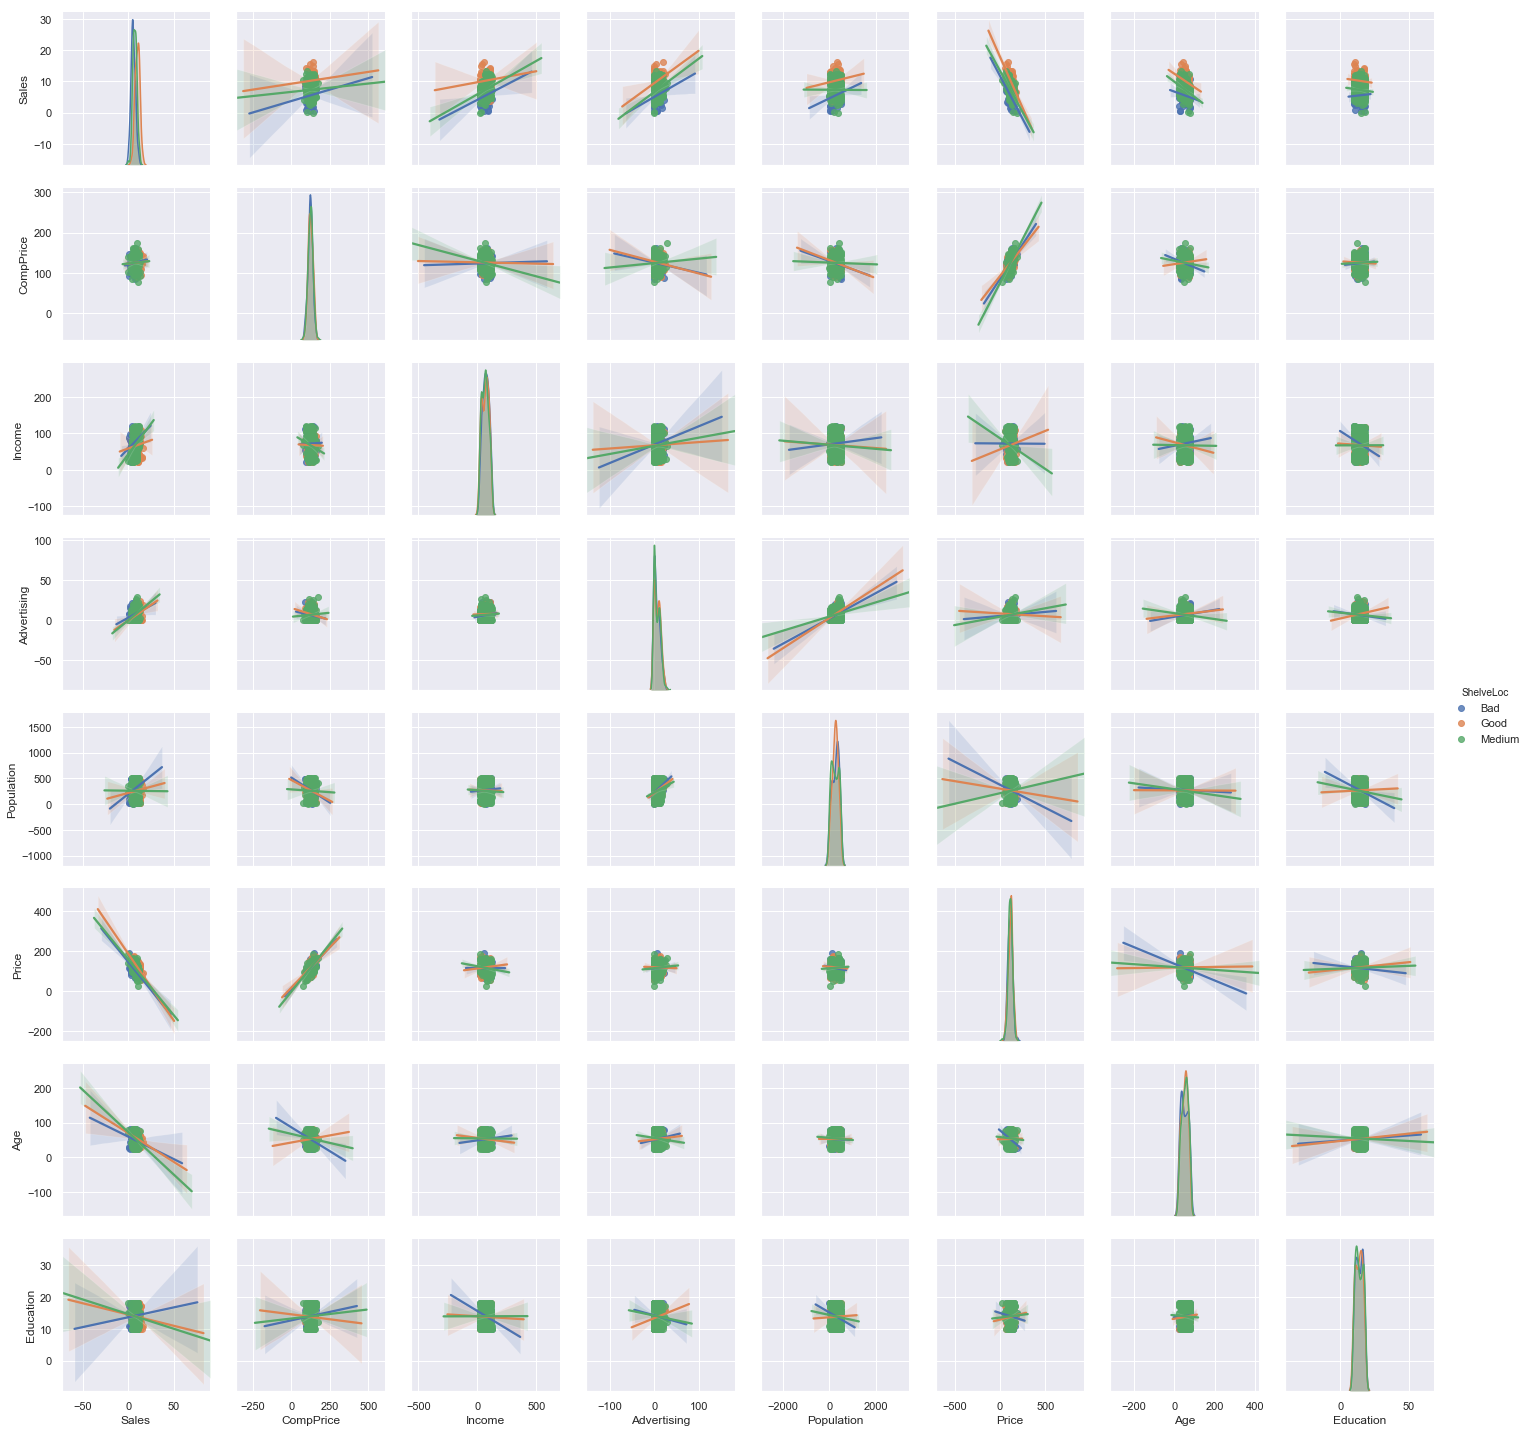

In [9]:
sns.pairplot(df, hue = 'ShelveLoc', kind = 'reg', diag_kind = 'kde')
plt.show()

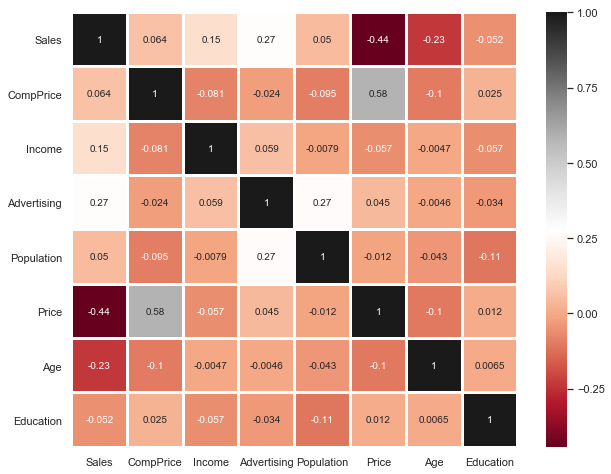

In [7]:
plt.subplots(figsize = (10, 8))
sns.heatmap(df.corr(), annot = True, linewidth = 2, cmap = 'RdGy')

## Fit a multiple regression model to predict Sales using Price, Urban, and US.

In [10]:
import statsmodels.formula.api as smf

results = smf.ols('Sales ~ Price + Urban + US', data = df).fit()

In [11]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Sat, 09 Mar 2019   Prob (F-statistic):           2.39e-23
Time:                        13:29:16   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0435      0.651     20.036      0.000      11.764      14.323
Urban[T.Yes]    -0.0219      0.272     -0.081      0.936      -0.556       0.512
US[T.Yes]        1.2006      0.259      4.635      0.000       0.691       1.710
Price           -0.0545      0.005    -10.389      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Dummies for the qualitative variables

In [14]:
df.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [15]:
df['ShelveLoc'].unique()

array(['Bad', 'Good', 'Medium'], dtype=object)

In [16]:
df['US'].replace(['Yes', 'No'], [1, 0], inplace = True)

In [17]:
df['Urban'].replace(['Yes', 'No'], [1,0], inplace = True)

In [18]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,1,1
1,11.22,111,48,16,260,83,Good,65,10,1,1
2,10.06,113,35,10,269,80,Medium,59,12,1,1
3,7.40,117,100,4,466,97,Medium,55,14,1,1
4,4.15,141,64,3,340,128,Bad,38,13,1,0


In [19]:
dummy_shelveLog = pd.get_dummies(df['ShelveLoc'])
dummy_shelveLog.columns = df['ShelveLoc'].unique()

In [20]:
dummy_shelveLog.head()

,Bad,Good,Medium
0,1,0,0
1,0,1,0
2,0,0,1
3,0,0,1
4,1,0,0


In [21]:
dummy_shelveLog.drop(['Bad'], axis = 1, inplace = True)

In [22]:
dummy_shelveLog.head()

,Good,Medium
0,0,0
1,1,0
2,0,1
3,0,1
4,0,0


In [23]:
df.drop(['ShelveLoc'], axis = 1, inplace = True)

In [24]:
df = df.join(dummy_shelveLog)
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,Good,Medium
0,9.50,138,73,11,276,120,42,17,1,1,0,0
1,11.22,111,48,16,260,83,65,10,1,1,1,0
2,10.06,113,35,10,269,80,59,12,1,1,0,1
3,7.40,117,100,4,466,97,55,14,1,1,0,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0


## Fitting linear model again using the dummy variables 

Looks like stats model works even without converting to the dummy variables. the results are identical. 

In [25]:
import statsmodels.formula.api as smf

results = smf.ols('Sales ~ Price + Urban + US', data = df).fit()

In [26]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Sat, 09 Mar 2019   Prob (F-statistic):           2.39e-23
Time:                        13:32:25   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0435      0.651     20.036      0.000      11.764      14.323
Price         -0.0545      0.005    -10.389      0.000      -0.065      -0.044
Urban         -0.0219      0.272     -0.081      0.936      -0.556       0.512
US             1.2006      0.259      4.635      0.000       0.691       1.710
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Fitting with dummy is no different than the fitting without converting the qualitative variables into the dummy. Which is expected. But the conversion to dummy is preferred for the computatinal efficiency. 

## Write out the model in equation form, being careful to handle the qualitative variables properly.

$ Sales = 13.0435 - 0.0545 Price - 0.0219 (Urban/Yes) + 1.2006 (US/Yes) $

In [27]:
def sales_qualitative_part(us, urban):
    return 13.0435 - 0.0219 * urban + 1.2006 * us

In [28]:
sales_matrix = pd.DataFrame({'US' : [str(round(sales_qualitative_part(1, 1), 4)) + ' - 0.0545 * Price', 
                                    str(round(sales_qualitative_part(1, 0), 4)) + ' - 0.0545 * Price'],
                             
                             'Non US' : [str(round(sales_qualitative_part(0, 1), 4)) + ' - 0.0545 * Price', 
                                    str(round(sales_qualitative_part(0, 0), 4)) + ' - 0.0545 * Price']
                            }, index = ['Urban', 'Non Urban'])

In [29]:
sales_matrix

,US,Non US
Urban,14.2222 - 0.0545 * Price,13.0216 - 0.0545 * Price
Non Urban,14.2441 - 0.0545 * Price,13.0435 - 0.0545 * Price


## For which of the predictors can you reject the null hypothesis $H_0 : β_j = 0$?

The p-value of urban is very high. SO we can reject the null hypothesis for this variable. 

## Fit a smaller model that only uses the predictors for which there is evidence of association with the outcome. Notice the 95% confidence limit for the coefficients are in this table

In [30]:
import statsmodels.formula.api as smf

results = smf.ols('Sales ~ Price + US', data = df).fit()

In [46]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Sat, 09 Mar 2019   Prob (F-statistic):           2.66e-24
Time:                        13:52:06   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.000      11.790      14.271
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
US             1.1996      0.258      4.641      0.000       0.692       1.708
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

the colums with [0.025, 0.975] are the values of the 95% confidence limits. For example value of intercept is 13.0308. It's 95% confidence interval is (11.79, 14.27)

## Explain which model better fits the data?

R-squared measure or the adjusted R-squared are hardly telling us anything. But looking at the value of F-statistics the smaller model is doing the better job. 

## Is there evidence of outliers or high leverage observations in the model?

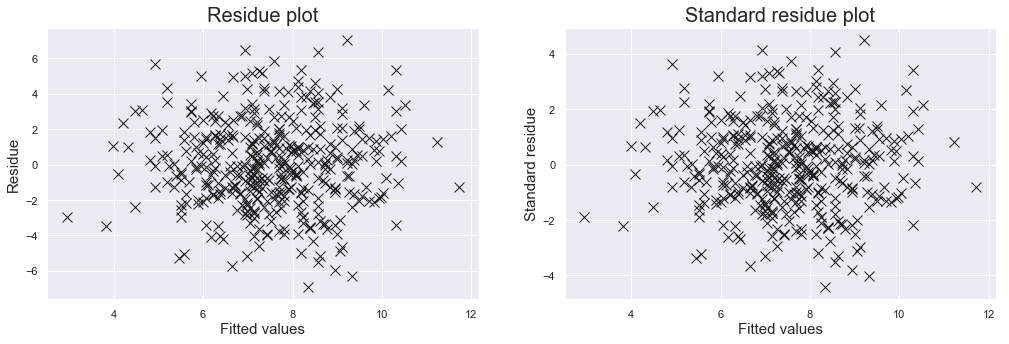

In [40]:
from statsmodels.tools.eval_measures import rmse

plt.figure(figsize = (17, 5))
plt.subplot(1, 2, 1)
plt.plot(results.fittedvalues, results.resid, 'kx', markersize = 10)
plt.xlabel('Fitted values', size = 15)
plt.ylabel('Residue', size = 15)
plt.title('Residue plot', size = 20)

plt.subplot(1, 2, 2)
plt.plot(results.fittedvalues, results.resid/np.sqrt(rmse(df['Sales'], results.fittedvalues)), 'kx', markersize = 10)
plt.xlabel('Fitted values', size = 15)
plt.ylabel('Standard residue', size = 15)
plt.title('Standard residue plot', size = 20)

plt.show()

Tjere are some outliers. The observation points with higher standard residue error (typically above 3) are considered outliers. The evidence of the presence of the outliers are seen from the leverage plot below as well. 

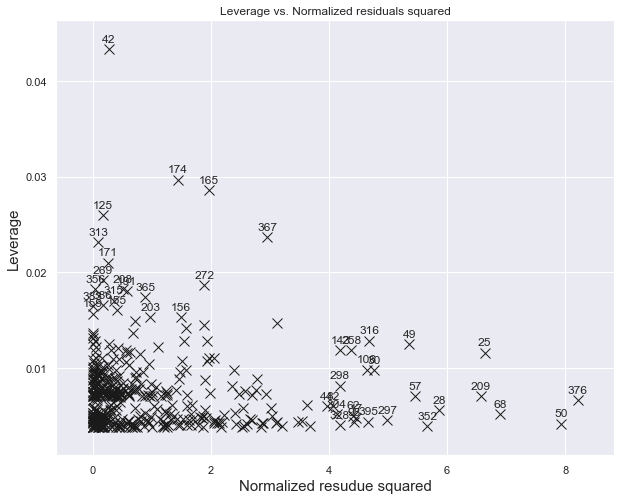

In [45]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2

fig, ax = plt.subplots(figsize=(10, 8))
fig = plot_leverage_resid2(results, ax = ax, color = 'k', marker = 'x', markersize = 10)
plt.xlabel('Normalized resudue squared', size = 15)
plt.ylabel('Leverage', size = 15)
plt.show()